Modelos Preditivos:
-

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as SkPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
from imblearn.ensemble import BalancedRandomForestClassifier  # CORRIGIDO
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [20]:

# Caminho relativo correto a partir da pasta 'notebooks'
df = pd.read_pickle('../data/df_unique.pkl')

# Cria uma cópia independente
df_copy = df.copy()

# Salva a cópia em um novo arquivo .pkl
df_copy.to_pickle('../data/df_unique_copy.pkl')

# Exibindo as primeiras linhas do DataFrame
df_copy.head()


,age,amt_active_loan,channel,ext_score_1,ext_score_2,ext_score_3,ext_score_4,flag_document_A,gender,ids,income,occupation_type,score_checks,score_date,start_hour,default,credit_card_initial_line,payment,date,credit_line,spends,score_month,score_days,date_ordinal
0,37,4560.0,NCqL3QBx0pscDnx3ixKwXg==,467.0,DGCQep2AE5QRkNCshIAlFQ==,LCak332j+TYFqHC3NDwiqg==,61.311861,NaN,m,648384b9-f932-d221-45d7-85d0aa0a412c,86301.53,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,2017-01-15,9.0,0,1300.0,198.40,2016-09-30,2180.0,198.40,2017-01,14,736237
1,37,4560.0,NCqL3QBx0pscDnx3ixKwXg==,467.0,DGCQep2AE5QRkNCshIAlFQ==,LCak332j+TYFqHC3NDwiqg==,61.311861,NaN,m,648384b9-f932-d221-45d7-85d0aa0a412c,86301.53,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,2017-01-15,9.0,0,1300.0,149.94,2016-10-31,2368.0,145.49,2017-01,14,736268
2,37,4560.0,NCqL3QBx0pscDnx3ixKwXg==,467.0,DGCQep2AE5QRkNCshIAlFQ==,LCak332j+TYFqHC3NDwiqg==,61.311861,NaN,m,648384b9-f932-d221-45d7-85d0aa0a412c,86301.53,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,2017-01-15,9.0,0,1300.0,10.02,2016-11-30,3103.0,10.02,2017-01,14,736298
3,37,4560.0,NCqL3QBx0pscDnx3ixKwXg==,467.0,DGCQep2AE5QRkNCshIAlFQ==,LCak332j+TYFqHC3NDwiqg==,61.311861,NaN,m,648384b9-f932-d221-45d7-85d0aa0a412c,86301.53,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,2017-01-15,9.0,0,1300.0,38.48,2016-12-31,2430.0,278.05,2017-01,14,736329
4,37,4560.0,NCqL3QBx0pscDnx3ixKwXg==,467.0,DGCQep2AE5QRkNCshIAlFQ==,LCak332j+TYFqHC3NDwiqg==,61.311861,NaN,m,648384b9-f932-d221-45d7-85d0aa0a412c,86301.53,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,2017-01-15,9.0,0,1300.0,2888.77,2017-01-31,2650.0,2888.77,2017-01,14,736360


Tratamento da variável target:
-

In [21]:
print("Contagem de valores únicos na coluna 'default':")
print(df_copy['default'].value_counts(dropna=False))


Contagem de valores únicos na coluna 'default':
default
0    214627
1     44877
Name: count, dtype: int64


In [22]:
df_copy['default'] = df_copy['default'].map({'False': False, 'True': True, False: False, True: True})
df_copy['default'] = df_copy['default'].map({False: 0, True: 1})
df_copy = df_copy[df_copy['default'].notna()]

Tratamento das demais variáveis:
-

In [23]:
# Garantindo que as colunas estão no formato datetime
df_copy['score_date'] = pd.to_datetime(df_copy['score_date'])
df_copy['date'] = pd.to_datetime(df_copy['date'])

# Extraindo features de score_date
df_copy['score_year'] = df_copy['score_date'].dt.year
df_copy['score_month'] = df_copy['score_date'].dt.month
df_copy['score_day'] = df_copy['score_date'].dt.day
df_copy['score_dayofweek'] = df_copy['score_date'].dt.dayofweek
df_copy['score_weekofyear'] = df_copy['score_date'].dt.isocalendar().week
df_copy['score_quarter'] = df_copy['score_date'].dt.quarter

# Extraindo features de date
df_copy['date_year'] = df_copy['date'].dt.year
df_copy['date_month'] = df_copy['date'].dt.month
df_copy['date_day'] = df_copy['date'].dt.day
df_copy['date_dayofweek'] = df_copy['date'].dt.dayofweek
df_copy['date_weekofyear'] = df_copy['date'].dt.isocalendar().week
df_copy['date_quarter'] = df_copy['date'].dt.quarter

# (Opcional) Criando feature de diferença em dias entre as duas datas
df_copy['days_diff'] = (df_copy['score_date'] - df_copy['date']).dt.days


In [ ]:
# Drop  columns
df_copy.drop(['channel', 'ids', 'score_date', 'date', 'date_ordinal'], axis=1, inplace=True)

# Preencher valores nulos de flag_document_A com a moda
df_copy['flag_document_A'].fillna(df_copy['flag_document_A'].mode()[0], inplace=True)

# Mapear True/False para 1/0
df_copy['flag_document_A'] = df_copy['flag_document_A'].astype(bool).astype(int)

# Mapear os valores da variável gender: 'm' → 1 e 'f' → 0
df_copy['gender'] = df_copy['gender'].map({'m': 1, 'f': 0})

df_copy.head(2)

C:\Users\josie\AppData\Local\Temp\ipykernel_18992\1194281572.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['flag_document_A'].fillna(df_copy['flag_document_A'].mode()[0], inplace=True)
C:\Users\josie\AppData\Local\Temp\ipykernel_18992\1194281572.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  

,age,amt_active_loan,ext_score_1,ext_score_2,ext_score_3,ext_score_4,flag_document_A,gender,income,occupation_type,score_checks,start_hour,default,credit_card_initial_line,payment,credit_line,spends,score_month,score_days,score_year,score_day,score_dayofweek,score_weekofyear,score_quarter,date_year,date_month,date_day,date_dayofweek,date_weekofyear,date_quarter,days_diff
0,37,4560.0,467.0,DGCQep2AE5QRkNCshIAlFQ==,LCak332j+TYFqHC3NDwiqg==,61.311861,1,1.0,86301.53,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,9.0,0,1300.0,198.40,2180.0,198.40,1,14,2017,15,6,2,1,2016,9,30,4,39,3,107
1,37,4560.0,467.0,DGCQep2AE5QRkNCshIAlFQ==,LCak332j+TYFqHC3NDwiqg==,61.311861,1,1.0,86301.53,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,9.0,0,1300.0,149.94,2368.0,145.49,1,14,2017,15,6,2,1,2016,10,31,0,44,4,76
2,37,4560.0,467.0,DGCQep2AE5QRkNCshIAlFQ==,LCak332j+TYFqHC3NDwiqg==,61.311861,1,1.0,86301.53,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,9.0,0,1300.0,10.02,3103.0,10.02,1,14,2017,15,6,2,1,2016,11,30,2,48,4,46
3,37,4560.0,467.0,DGCQep2AE5QRkNCshIAlFQ==,LCak332j+TYFqHC3NDwiqg==,61.311861,1,1.0,86301.53,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,9.0,0,1300.0,38.48,2430.0,278.05,1,14,2017,15,6,2,1,2016,12,31,5,52,4,15
4,37,4560.0,467.0,DGCQep2AE5QRkNCshIAlFQ==,LCak332j+TYFqHC3NDwiqg==,61.311861,1,1.0,86301.53,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,9.0,0,1300.0,2888.77,2650.0,2888.77,1,14,2017,15,6,2,1,2017,1,31,1,5,1,-16
5,37,4560.0,467.0,DGCQep2AE5QRkNCshIAlFQ==,LCak332j+TYFqHC3NDwiqg==,61.311861,1,1.0,86301.53,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,9.0,0,1300.0,715.24,2828.0,715.24,1,14,2017,15,6,2,1,2017,2,28,1,9,1,-44
6,37,4560.0,467.0,DGCQep2AE5QRkNCshIAlFQ==,LCak332j+TYFqHC3NDwiqg==,61.311861,1,1.0,86301.53,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,9.0,0,1300.0,13.73,2480.0,667.83,1,14,2017,15,6,2,1,2017,3,31,4,13,1,-75
23,46,47720.0,324.0,fyrlulOiZ+5hoFqLa6UbDQ==,Fv28Bz0YRTVAT5kl1bAV6g==,71.497943,1,0.0,191517.40,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,20.0,11.0,0,2200.0,797.25,1996.0,868.18,1,12,2017,13,4,2,1,2016,9,30,4,39,3,105
24,46,47720.0,324.0,fyrlulOiZ+5hoFqLa6UbDQ==,Fv28Bz0YRTVAT5kl1bAV6g==,71.497943,1,0.0,191517.40,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,20.0,11.0,0,2200.0,527.27,1881.0,344.11,1,12,2017,13,4,2,1,2016,10,31,0,44,4,74
25,46,47720.0,324.0,fyrlulOiZ+5hoFqLa6UbDQ==,Fv28Bz0YRTVAT5kl1bAV6g==,71.497943,1,0.0,191517.40,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,20.0,11.0,0,2200.0,339.88,1788.0,339.88,1,12,2017,13,4,2,1,2016,11,30,2,48,4,44


In [25]:
# Remover espaços e verificar valores únicos
df_copy['ext_score_2_clean'] = df_copy['ext_score_2'].astype(str).str.strip()

df_copy['ext_score_3_clean'] = df_copy['ext_score_3'].astype(str).str.strip()

In [26]:
# Criar categorias fixas com pd.Categorical
ext_score_2_categories = df_copy['ext_score_2_clean'].unique()
df_copy['ext_score_2_cat'] = pd.Categorical(df_copy['ext_score_2_clean'], categories=ext_score_2_categories)

ext_score_3_categories = df_copy['ext_score_3_clean'].unique()
df_copy['ext_score_3_cat'] = pd.Categorical(df_copy['ext_score_3_clean'], categories=ext_score_3_categories)

In [27]:
ext_score_2_encoded = pd.get_dummies(df_copy['ext_score_2_cat'], prefix='ext_score_2').astype(int)
print(ext_score_2_encoded.head())


   ext_score_2_DGCQep2AE5QRkNCshIAlFQ==  ext_score_2_fyrlulOiZ+5hoFqLa6UbDQ==  \
0                                     1                                     0   
1                                     1                                     0   
2                                     1                                     0   
3                                     1                                     0   
4                                     1                                     0   

   ext_score_2_1Rk8w4Ucd5yR3KcqZzLdow==  ext_score_2_8k8UDR4Yx0qasAjkGrUZLw==  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   ext_score_2_4DLlLW62jRe

In [28]:
ext_score_3_encoded = pd.get_dummies(df_copy['ext_score_3_cat'], prefix='ext_score_3').astype(int)
print(ext_score_3_encoded.head())

   ext_score_3_LCak332j+TYFqHC3NDwiqg==  ext_score_3_Fv28Bz0YRTVAT5kl1bAV6g==  \
0                                     1                                     0   
1                                     1                                     0   
2                                     1                                     0   
3                                     1                                     0   
4                                     1                                     0   

   ext_score_3_w1miZqhB5+RSamEQJa0rqg==  ext_score_3_O4i7FxcROACMVTCgI0WXuA==  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   ext_score_3_rJZgTmANW3P

In [29]:
valor_linha0 = df_copy.loc[0, 'ext_score_2_cat']
coluna_dummy = f'ext_score_2_{valor_linha0}'

if coluna_dummy in ext_score_2_encoded.columns:
    print(f"Dummy correta na linha 0: {ext_score_2_encoded.loc[0, coluna_dummy]}")
else:
    print(f"A coluna {coluna_dummy} não foi criada.")


Dummy correta na linha 0: 1


In [30]:
# Verifique a linha 0, por exemplo:
valor_linha0 = df_copy.loc[0, 'ext_score_3_cat']
coluna_dummy = f'ext_score_3_{valor_linha0}'

if coluna_dummy in ext_score_3_encoded.columns:
    print(f"Dummy correta na linha 0: {ext_score_3_encoded.loc[0, coluna_dummy]}")
else:
    print(f"A coluna {coluna_dummy} não foi criada.")


Dummy correta na linha 0: 1


In [34]:
df_copy_encoded = pd.concat([
    df_copy.drop(columns=['ext_score_2', 'ext_score_2_clean', 'ext_score_2_cat']),
    ext_score_2_encoded
], axis=1)

df_copy_encoded = pd.concat([
    df_copy_encoded.drop(columns=['ext_score_3', 'ext_score_3_clean', 'ext_score_3_cat']),
    ext_score_3_encoded
], axis=1)

pd.set_option('display.max_columns', None)

ext_cols = [col for col in df_copy_encoded.columns if 'ext_score_2' in col or 'ext_score_3' in col]
other_cols = [col for col in df_copy_encoded.columns if col not in ext_cols]

df_copy_encoded = df_copy_encoded[other_cols + ext_cols]
df_copy_encoded.head()


,age,amt_active_loan,ext_score_1,ext_score_4,flag_document_A,gender,income,occupation_type,score_checks,start_hour,default,credit_card_initial_line,payment,credit_line,spends,score_month,score_days,score_year,score_day,score_dayofweek,score_weekofyear,score_quarter,date_year,date_month,date_day,date_dayofweek,date_weekofyear,date_quarter,days_diff,ext_score_2_DGCQep2AE5QRkNCshIAlFQ==,ext_score_2_fyrlulOiZ+5hoFqLa6UbDQ==,ext_score_2_1Rk8w4Ucd5yR3KcqZzLdow==,ext_score_2_8k8UDR4Yx0qasAjkGrUZLw==,ext_score_2_4DLlLW62jReXaqbPaHp1vQ==,ext_score_2_e4NYDor1NOw6XKGE60AWFw==,ext_score_2_smzX0nxh5QlePvtVf6EAeg==,ext_score_3_LCak332j+TYFqHC3NDwiqg==,ext_score_3_Fv28Bz0YRTVAT5kl1bAV6g==,ext_score_3_w1miZqhB5+RSamEQJa0rqg==,ext_score_3_O4i7FxcROACMVTCgI0WXuA==,ext_score_3_rJZgTmANW3PjOCQLCcp4iQ==,ext_score_3_pAzpxkhjPsjWldgSX21+zg==,ext_score_3_7h+tk4z7O9brtBSe1rNjxA==,ext_score_3_mX2VRRG38RPiHX+MfjefRw==,ext_score_3_tQUTfUyeuGkhRotd+6WjVg==,ext_score_3_OlDYtdljgSSYM/M1L2CRaQ==,ext_score_3_RO7MTL+j4PH2gNzbhNTq/A==,ext_score_3_emS9xH8CLoRNie2uSmaDAQ==,ext_score_3_vJyc9xom9v7hwFMPTIpmKw==,ext_score_3_wjdj2vxjWoDsEIk0l09ynw==,ext_score_3_ky19q4V1ZqgL3jnHX0wKDw==,ext_score_3_dCm9hFKfdRm7ej3jW+gyxw==,ext_score_3_d/7Hedyz7ovK9Pn1CYN4+A==,ext_score_3_YLGMUI9hObSh6wD/xfanGg==,ext_score_3_osCzpM4hJrxugqWWuZmMWw==,ext_score_3_wkeCdGeu5sEv4/fjwR0aDg==,ext_score_3_NLvAOzzmJba/0zolQnWF5Q==,ext_score_3_/tdlnWjXoZ3OjdtBXzdOJQ==,ext_score_3_dWJRASUFMejk3AHZ1p1Gkg==,ext_score_3_6J1ZMTzN5GKHXnhM4J1JbA==,ext_score_3_tHpS8e9F8d9zg3iOQM9tsA==,ext_score_3_IOVu8au3ISbo6+zmfnYwMg==,ext_score_3_55UK234RR1d7HIWJjmq9tw==,ext_score_3_SaamrHMo23l/3TwXOWgVzw==,ext_score_3_cdpgyOyZS04uXerMNu7uCw==,ext_score_3_A+QuW1n/ABeiVVe/9CRZ9Q==,ext_score_3_7h8PTkrlTWUPP3yuyP4rUg==,ext_score_3_+CxEO4w7jv3QPI/BQbyqAA==,ext_score_3_+2hzpeP1RWr8PEvL1WTUdw==,ext_score_3_5/uMrqKj3OL/Xk5OrGx9fg==,ext_score_3_bopP0NxW3+r8tn9xIHTaOw==
0,37,4560.0,467.0,61.311861,1,1.0,86301.53,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,9.0,0,1300.0,198.40,2180.0,198.40,1,14,2017,15,6,2,1,2016,9,30,4,39,3,107,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,37,4560.0,467.0,61.311861,1,1.0,86301.53,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,9.0,0,1300.0,149.94,2368.0,145.49,1,14,2017,15,6,2,1,2016,10,31,0,44,4,76,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,37,4560.0,467.0,61.311861,1,1.0,86301.53,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,9.0,0,1300.0,10.02,3103.0,10.02,1,14,2017,15,6,2,1,2016,11,30,2,48,4,46,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,37,4560.0,467.0,61.311861,1,1.0,86301.53,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,9.0,0,1300.0,38.48,2430.0,278.05,1,14,2017,15,6,2,1,2016,12,31,5,52,4,15,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,4560.0,467.0,61.311861,1,1.0,86301.53,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8.0,9.0,0,1300.0,2888.77,2650.0,2888.77,1,14,2017,15,6,2,1,2017,1,31,1,5,1,-16,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
# Parâmetros
n_splits = 5
target_col = 'default'
cat_col = 'occupation_type'
encoded_col = cat_col + '_te'

# Inicializa a nova coluna
df_copy_encoded[encoded_col] = np.nan

# KFold 
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(df_copy_encoded):
    train_fold = df_copy_encoded.iloc[train_idx]
    val_fold = df_copy_encoded.iloc[val_idx]
    
    # Cálculo do target mean por categoria
    means = train_fold.groupby(cat_col)[target_col].mean()
    
    # Mapeia no fold de validação
    df_copy_encoded.loc[df_copy_encoded.index[val_idx], encoded_col] = val_fold[cat_col].map(means)

# Após o loop, pode preencher categorias ausentes com o global mean
global_mean = df_copy_encoded[target_col].mean()
df_copy_encoded[encoded_col].fillna(global_mean, inplace=True)

df_copy_encoded.drop(columns=[cat_col], inplace=True)

df_copy_encoded.head()

C:\Users\josie\AppData\Local\Temp\ipykernel_18992\1243101446.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy_encoded[encoded_col].fillna(global_mean, inplace=True)


,age,amt_active_loan,ext_score_1,ext_score_4,flag_document_A,gender,income,score_checks,start_hour,default,credit_card_initial_line,payment,credit_line,spends,score_month,score_days,score_year,score_day,score_dayofweek,score_weekofyear,score_quarter,date_year,date_month,date_day,date_dayofweek,date_weekofyear,date_quarter,days_diff,ext_score_2_DGCQep2AE5QRkNCshIAlFQ==,ext_score_2_fyrlulOiZ+5hoFqLa6UbDQ==,ext_score_2_1Rk8w4Ucd5yR3KcqZzLdow==,ext_score_2_8k8UDR4Yx0qasAjkGrUZLw==,ext_score_2_4DLlLW62jReXaqbPaHp1vQ==,ext_score_2_e4NYDor1NOw6XKGE60AWFw==,ext_score_2_smzX0nxh5QlePvtVf6EAeg==,ext_score_3_LCak332j+TYFqHC3NDwiqg==,ext_score_3_Fv28Bz0YRTVAT5kl1bAV6g==,ext_score_3_w1miZqhB5+RSamEQJa0rqg==,ext_score_3_O4i7FxcROACMVTCgI0WXuA==,ext_score_3_rJZgTmANW3PjOCQLCcp4iQ==,ext_score_3_pAzpxkhjPsjWldgSX21+zg==,ext_score_3_7h+tk4z7O9brtBSe1rNjxA==,ext_score_3_mX2VRRG38RPiHX+MfjefRw==,ext_score_3_tQUTfUyeuGkhRotd+6WjVg==,ext_score_3_OlDYtdljgSSYM/M1L2CRaQ==,ext_score_3_RO7MTL+j4PH2gNzbhNTq/A==,ext_score_3_emS9xH8CLoRNie2uSmaDAQ==,ext_score_3_vJyc9xom9v7hwFMPTIpmKw==,ext_score_3_wjdj2vxjWoDsEIk0l09ynw==,ext_score_3_ky19q4V1ZqgL3jnHX0wKDw==,ext_score_3_dCm9hFKfdRm7ej3jW+gyxw==,ext_score_3_d/7Hedyz7ovK9Pn1CYN4+A==,ext_score_3_YLGMUI9hObSh6wD/xfanGg==,ext_score_3_osCzpM4hJrxugqWWuZmMWw==,ext_score_3_wkeCdGeu5sEv4/fjwR0aDg==,ext_score_3_NLvAOzzmJba/0zolQnWF5Q==,ext_score_3_/tdlnWjXoZ3OjdtBXzdOJQ==,ext_score_3_dWJRASUFMejk3AHZ1p1Gkg==,ext_score_3_6J1ZMTzN5GKHXnhM4J1JbA==,ext_score_3_tHpS8e9F8d9zg3iOQM9tsA==,ext_score_3_IOVu8au3ISbo6+zmfnYwMg==,ext_score_3_55UK234RR1d7HIWJjmq9tw==,ext_score_3_SaamrHMo23l/3TwXOWgVzw==,ext_score_3_cdpgyOyZS04uXerMNu7uCw==,ext_score_3_A+QuW1n/ABeiVVe/9CRZ9Q==,ext_score_3_7h8PTkrlTWUPP3yuyP4rUg==,ext_score_3_+CxEO4w7jv3QPI/BQbyqAA==,ext_score_3_+2hzpeP1RWr8PEvL1WTUdw==,ext_score_3_5/uMrqKj3OL/Xk5OrGx9fg==,ext_score_3_bopP0NxW3+r8tn9xIHTaOw==,occupation_type_te
0,37,4560.0,467.0,61.311861,1,1.0,86301.53,8.0,9.0,0,1300.0,198.40,2180.0,198.40,1,14,2017,15,6,2,1,2016,9,30,4,39,3,107,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.687500
1,37,4560.0,467.0,61.311861,1,1.0,86301.53,8.0,9.0,0,1300.0,149.94,2368.0,145.49,1,14,2017,15,6,2,1,2016,10,31,0,44,4,76,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.687500
2,37,4560.0,467.0,61.311861,1,1.0,86301.53,8.0,9.0,0,1300.0,10.02,3103.0,10.02,1,14,2017,15,6,2,1,2016,11,30,2,48,4,46,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.538462
3,37,4560.0,467.0,61.311861,1,1.0,86301.53,8.0,9.0,0,1300.0,38.48,2430.0,278.05,1,14,2017,15,6,2,1,2016,12,31,5,52,4,15,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.600000
4,37,4560.0,467.0,61.311861,1,1.0,86301.53,8.0,9.0,0,1300.0,2888.77,2650.0,2888.77,1,14,2017,15,6,2,1,2017,1,31,1,5,1,-16,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.615385


Preparando as colunas:
- 

In [36]:
# Separação em features e target:
X = df_copy_encoded.drop(columns=['default'])
y = df_copy_encoded['default']

In [37]:
# Divisão em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # importante para problemas desbalanceados
)

In [38]:
# Colunas com valores ausentes
numeric_cols_with_nan = ['amt_active_loan']
categorical_cols_with_nan = ['gender']

Modelo Baseline
-

Neste momento vamos verificar a distribuição do nossos dados. 
- Observa-se:
- A classe 0 (Não Default) tem concentração de scores perto de 0.
- A classe 1 (Default) está bem agrupada perto de 1.


In [45]:
# Identificar colunas numéricas e categóricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Pipeline para numéricos: imputar média + escalar
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline para categóricos: imputar moda + one-hot encode
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar preprocessadores
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# Pipeline final
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Treinar
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'amt_active_loan',
                                                   'ext_score_1', 'ext_score_4',
                                                   'flag_document_A', 'gender',
                                                   'income', 'score_checks',
                                                   'start_hour',
                                                   'credit_card_initial_line',
                                                   'payment', 'credit_line',
                                                   'spends', 'score_days',
                                                   'days_diff',
                                                   'ex...
                                                   'ext_score_3_rJZgTmANW3PjOCQLCcp4iQ==',
                                                   'ext_score_3_pAzpxkhjPsjWldgSX21+zg==',
                                                   'ext_score_3_7h+tk4z7O9brtBSe1rNjxA==',
                                                   'ext_score_3_mX2VRRG38RPiHX+MfjefRw==', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     42926
           1       0.93      0.78      0.85      8975

    accuracy                           0.95     51901
   macro avg       0.94      0.88      0.91     51901
weighted avg       0.95      0.95      0.95     51901

ROC AUC: 0.9781144982678618


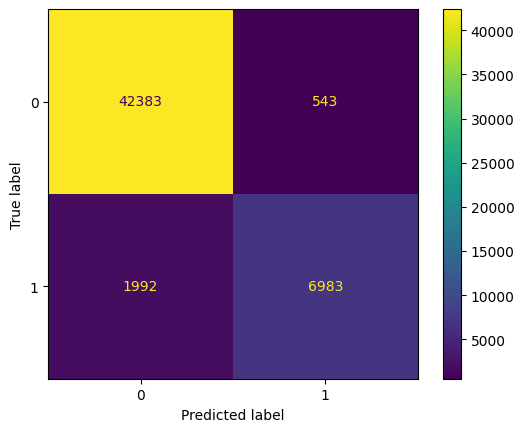

In [46]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Previsões no teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Métricas
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Matriz de confusão
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


Log Loss: 0.0457


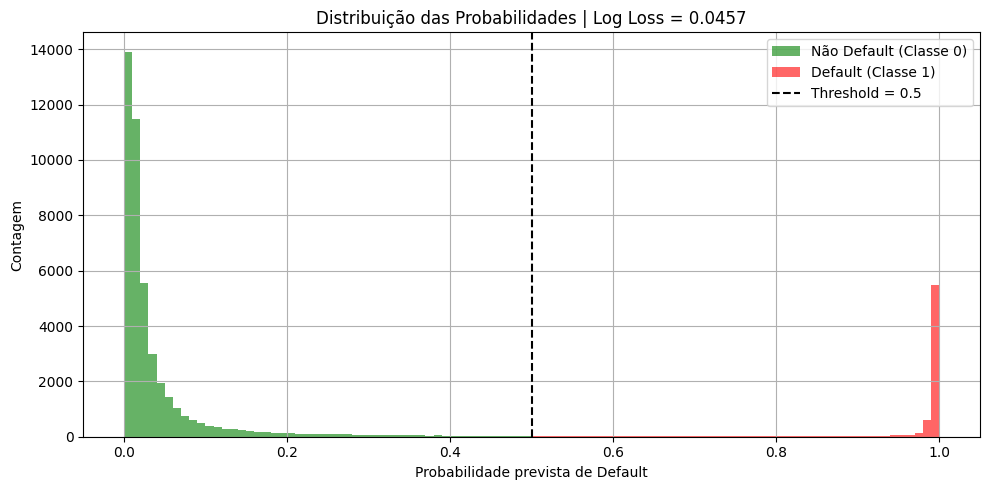

In [49]:
#  Calcular e plotar o Log Loss
y_test = y_pred  # ou df_copy_encoded["default"]
y_proba = model.predict_proba(X_test)[:, 1]

# 1. Calcular o Log Loss
logloss_value = log_loss(y_test, y_proba)
print(f"Log Loss: {logloss_value:.4f}")

# 2. Plotar histograma das probabilidades para visualização
plt.figure(figsize=(10, 5))
plt.hist(y_proba[y_test == 0], bins=50, alpha=0.6, label='Não Default (Classe 0)', color='green')
plt.hist(y_proba[y_test == 1], bins=50, alpha=0.6, label='Default (Classe 1)', color='red')
plt.axvline(0.5, color='black', linestyle='--', label='Threshold = 0.5')
plt.title(f'Distribuição das Probabilidades | Log Loss = {logloss_value:.4f}')
plt.xlabel('Probabilidade prevista de Default')
plt.ylabel('Contagem')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Pré-Processamento:
-

In [50]:
# Imputadores
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_imputer, numeric_cols_with_nan),
        ('cat', categorical_imputer, categorical_cols_with_nan)
    ],
    remainder='passthrough'  # Mantém todas as outras colunas
)


In [51]:
# Pipeline completo com imputação e padronização
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),       
    ('scaler', StandardScaler()),                        
    ('model', LogisticRegression(
        max_iter=1000, 
        class_weight='balanced', 
        random_state=42
    ))
])


Treinando o modelo:
-

In [52]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [53]:
# Avaliando o conjunto de teste:
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97     44375
           1       0.74      1.00      0.85      7526

    accuracy                           0.95     51901
   macro avg       0.87      0.97      0.91     51901
weighted avg       0.96      0.95      0.95     51901



In [54]:
# Validação cruzada estratificada (5 folds) com cross_val_score
cv_scores = cross_val_score(
    pipeline, X, y,
    cv=5,
    scoring='roc_auc' 
)

print("AUC média na validação cruzada:", round(np.mean(cv_scores), 4))
print("AUC por fold:", np.round(cv_scores, 4))


AUC média na validação cruzada: 0.9803
AUC por fold: [0.9793 0.9811 0.9792 0.9807 0.9811]


- AUC média tem o valor de 0.9803 na validação cruzada indica que seu modelo tem excelente capacidade discriminativa.

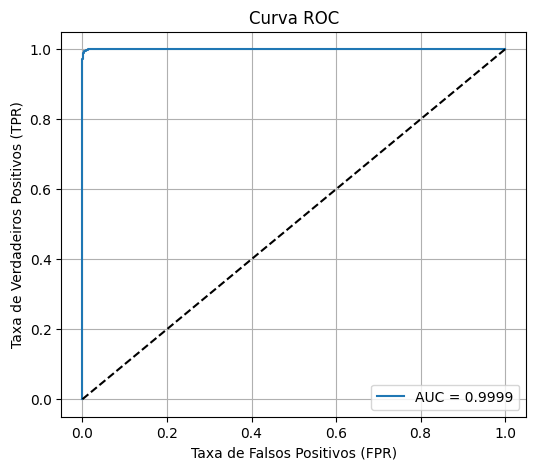

In [55]:
# Curva ROC e AUC

# Obter probabilidades do modelo (para AUC)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plotar curva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.grid()
plt.show()


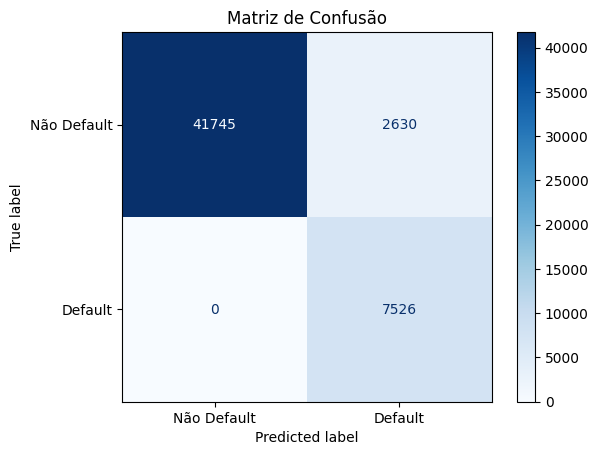

In [56]:
# Predição
y_pred = pipeline.predict(X_test)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Default', 'Default'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.grid(False)
plt.show()


- A matriz de confusão mostra que o modelo está classificando muito bem tanto os casos de default quanto os de não default, com poucos falsos negativos (1052) e falsos positivos (2233).

In [57]:
# Calculando Precisão, Recall e F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Precisão: 0.7410
Recall: 1.0000
F1-score: 0.8513


Criando pipeline com o modelo Random Forest:
-

In [ ]:

# Definir o modelo
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Criar pipeline com imputação e o modelo
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('rf', rf_model)
])


In [61]:
# Treinar no conjunto de treino
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [62]:
# 2. Previsões de probabilidade
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = rf_model.predict(X_test)

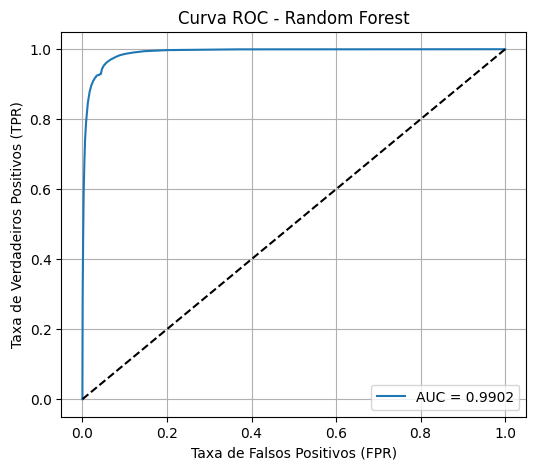

In [63]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc = roc_auc_score(y_test, y_proba_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC - Random Forest')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

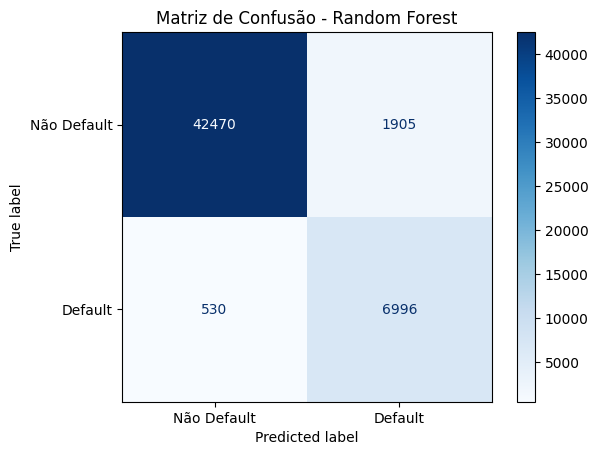

In [64]:

# 4. Matriz de confusão
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Default', 'Default'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.show()


In [65]:
# Gera o relatório com precisão, recall, F1 e suporte por classe
print("Relatório de Classificação - Random Forest:\n")
print(classification_report(y_test, y_pred_rf, target_names=["Não Default", "Default"]))


Relatório de Classificação - Random Forest:

              precision    recall  f1-score   support

 Não Default       0.99      0.96      0.97     44375
     Default       0.79      0.93      0.85      7526

    accuracy                           0.95     51901
   macro avg       0.89      0.94      0.91     51901
weighted avg       0.96      0.95      0.95     51901



In [68]:
# Função para criar pipeline com o modelo passado
def make_pipeline(model):
    return Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

# Instanciar os modelos com parâmetros básicos e balanceamento
models = [
    BalancedRandomForestClassifier(random_state=1234),
    LGBMClassifier(class_weight='balanced', random_state=1234),
    XGBClassifier(scale_pos_weight=19, random_state=1234, use_label_encoder=False, eval_metric='logloss'),
    DecisionTreeClassifier(class_weight='balanced', random_state=1234),
    LogisticRegression(class_weight='balanced', solver='liblinear', random_state=1234)
]

model_names = ["Balanced RF", "Light GBM", "XGBoost", "Decision Tree", "Logistic Regression"]

log_loss_results = []

# Supondo que X_train e y_train já estão definidos
for model, name in zip(models, model_names):
    pipe = make_pipeline(model)
    # Cross-validation para prever probabilidades no treino
    y_pred_proba = cross_val_predict(pipe, X_train, y_train, cv=5, method='predict_proba')[:, 1]
    
    # Calcular log loss
    logloss = log_loss(y_train, y_pred_proba)
    log_loss_results.append(logloss)
    
    print(f"{name} - Log Loss: {logloss:.4f}")


Balanced RF - Log Loss: 0.0704


c:\Projetos\Credit_Fintech\credito_fintech\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Projetos\Credit_Fintech\credito_fintech\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\josie\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\josie\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1039, in

[LightGBM] [Info] Number of positive: 28722, number of negative: 137360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2981
[LightGBM] [Info] Number of data points in the train set: 166082, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Projetos\Credit_Fintech\credito_fintech\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 28721, number of negative: 137361
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2981
[LightGBM] [Info] Number of data points in the train set: 166082, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Projetos\Credit_Fintech\credito_fintech\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 28721, number of negative: 137361
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2981
[LightGBM] [Info] Number of data points in the train set: 166082, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Projetos\Credit_Fintech\credito_fintech\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 28722, number of negative: 137361
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2980
[LightGBM] [Info] Number of data points in the train set: 166083, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Projetos\Credit_Fintech\credito_fintech\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 28722, number of negative: 137361
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2981
[LightGBM] [Info] Number of data points in the train set: 166083, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


c:\Projetos\Credit_Fintech\credito_fintech\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Light GBM - Log Loss: 0.0950


c:\Projetos\Credit_Fintech\credito_fintech\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:51:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Projetos\Credit_Fintech\credito_fintech\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:51:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Projetos\Credit_Fintech\credito_fintech\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:51:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Projetos\Credit_Fintech\credito_fintech\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:51:46] WARNING: C:\actions-runner\_work\xgboost\xgbo

XGBoost - Log Loss: 0.0810
Decision Tree - Log Loss: 0.2155
Logistic Regression - Log Loss: 0.1930


Ajuste dos hiperparâmetros
-

In [70]:
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Função para criar pipeline
def make_pipeline(model):
    return Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

# Instanciar o modelo base
brf = BalancedRandomForestClassifier(random_state=1234)

pipe = make_pipeline(brf)

# Definir grade de hiperparâmetros para testar
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__min_samples_split': [2, 5, 10],
}

# Criar objeto GridSearchCV
grid_search = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=3,
    scoring='neg_log_loss',  # otimizando log loss
    verbose=2,
    n_jobs=-1
)

# Rodar o Grid Search (pode levar um tempo)
grid_search.fit(X_train, y_train)

# Melhor conjunto de parâmetros
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

# Melhor score (log loss negativo)
print(f"Melhor Log Loss: {-grid_search.best_score_:.4f}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Melhores parâmetros encontrados:
{'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Melhor Log Loss: 0.0794
